# Nejistota bodu histogramu + vliv na $\Delta S/S_0$

In [1]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [87]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 16
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

In [5]:
import numpy as np

####################### vstup

# data z picoharpu ve formatu: array(  ) sloupce: jednotlive histogramy -- posledni radek nula
# [data jednotlivych hist, cislo histogramy]
fotkor = np.genfromtxt("sigma_hist_test_256_delim.txt", delimiter="\t")[:,:-1] # signal bez MM 

# print(fotkor)

# pomocne promene
fotkor_shape = np.shape(fotkor)
print(fotkor_shape)

# parametry odecitani foton-korelacnich dat
t_res = [ 256e-12, 256e-12, 256e-12, 256e-12, 256e-12, 256e-12, 256e-12]  # casove rozliseni histogramu v s
t_measure = [5, 10, 20, 40, 60, 100, 150] # doba nacitani dat v s
background_photocounts = [120, 120, 120, 120, 120, 120, 130]

# casova skala foton-kor. dat
# t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

hist_sigmas = np.std(fotkor[:-2,:], axis=0)

from EMM_min_func import get_hist_fit_single_photocountssum

DeltaS_S_ratio = np.zeros(fotkor_shape[1])
Delta_S_S_ratio_sigma_1 = np.zeros(fotkor_shape[1])
photon_sum_1 = np.zeros(fotkor_shape[1])
hist_sigmas_1 = np.zeros(fotkor_shape[1])
# fot_phi_sigma = np.zeros(fotkor_shape[1])
# x = np.zeros((3,fotkor_shape[1]))
# Omega = np.zeros(fotkor_shape[1])
# Omega_sigma = np.zeros(fotkor_shape[1])
# nu = np.zeros(fotkor_shape[1])
# t_scale = np.zeros(fotkor_shape[1])

for i in range(fotkor_shape[1]):
#     get_hist_fit_single(fotkor[:-2,i], t_res, t_measure[i], 0, hist_sigmas[i] )
    DeltaS_S_ratio[i], Delta_S_S_ratio_sigma_1[i], photon_sum_1[i], hist_sigmas_1[i] = get_hist_fit_single_photocountssum(fotkor[:,i], t_res[i], t_measure[i], background_photocounts[i] )
    
print(Delta_S_S_ratio_sigma_1)
print(hist_sigmas_1)
print(hist_sigmas_1 - hist_sigmas)

(132, 7)
[0.01315265 0.00829841 0.0055849  0.00458047 0.00328604 0.00267021
 0.00224201]
[11.7076822  14.87633441 20.44297741 32.9064444  35.99406263 50.60113255
 57.87929953]
[ 0.00000000e+00  0.00000000e+00  3.55271368e-15  0.00000000e+00
  1.42108547e-14  0.00000000e+00 -1.42108547e-14]


Predpokladam, ze $S(t)$ je konstantni. Odhad $\sigma_{\rm hist}$ by mela odpovidat klasickemu odhadu standardni odchylky

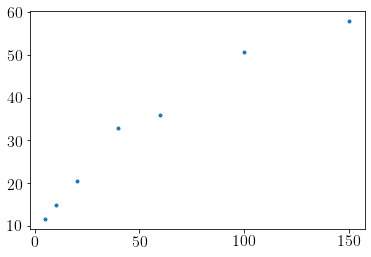

In [6]:
plt.plot(t_measure, hist_sigmas, '.')

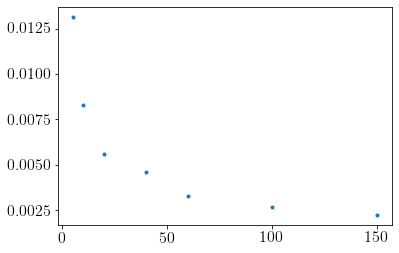

In [7]:
plt.plot(t_measure, Delta_S_S_ratio_sigma_1, '.')

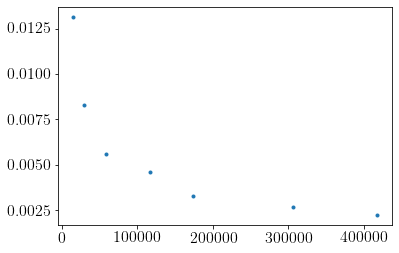

In [8]:
plt.plot(photon_sum_1, Delta_S_S_ratio_sigma_1, '.')

## dalsi data

(132, 7)
[0.01777636 0.01261711 0.00894065 0.00634617 0.00505239 0.00370068
 0.00353968]
[ 7.88610117 10.63332931 15.06561782 22.3490717  26.26755936 30.58373412
 44.21215662]
[2.66453526e-15 0.00000000e+00 0.00000000e+00 3.55271368e-15
 0.00000000e+00 3.90798505e-14 7.10542736e-15]


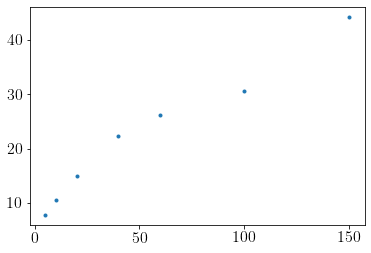

In [9]:
import numpy as np

####################### vstup

# data z picoharpu ve formatu: array(  ) sloupce: jednotlive histogramy -- posledni radek nula
# [data jednotlivych hist, cislo histogramy]
fotkor = np.genfromtxt("sigma_hist_test_256_pulcount_delim.txt", delimiter="\t")[:,:-1] # signal bez MM 

# print(fotkor)

# pomocne promene
fotkor_shape = np.shape(fotkor)
print(fotkor_shape)

# parametry odecitani foton-korelacnich dat
t_res = [ 256e-12, 256e-12, 256e-12, 256e-12, 256e-12, 256e-12, 256e-12]  # casove rozliseni histogramu v s
t_measure = [5, 10, 20, 40, 60, 100, 150] # doba nacitani dat v s
background_photocounts = [120, 120, 120, 120, 120, 120, 120]

# casova skala foton-kor. dat
# t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

hist_sigmas = np.std(fotkor[:-2,:], axis=0)

from EMM_min_func import get_hist_fit_single_photocountssum

DeltaS_S_ratio = np.zeros(fotkor_shape[1])
Delta_S_S_ratio_sigma_2 = np.zeros(fotkor_shape[1])
photon_sum_2 = np.zeros(fotkor_shape[1])
hist_sigmas_2 = np.zeros(fotkor_shape[1])
# fot_phi_sigma = np.zeros(fotkor_shape[1])
# x = np.zeros((3,fotkor_shape[1]))
# Omega = np.zeros(fotkor_shape[1])
# Omega_sigma = np.zeros(fotkor_shape[1])
# nu = np.zeros(fotkor_shape[1])
# t_scale = np.zeros(fotkor_shape[1])

for i in range(fotkor_shape[1]):
#     get_hist_fit_single(fotkor[:-2,i], t_res, t_measure[i], 0, hist_sigmas[i] )
    DeltaS_S_ratio[i], Delta_S_S_ratio_sigma_2[i], photon_sum_2[i], hist_sigmas_2[i] = get_hist_fit_single_photocountssum(fotkor[:,i], t_res[i], t_measure[i], background_photocounts[i])
    
# print(DeltaS_S_ratio)
print(Delta_S_S_ratio_sigma_2)

print(hist_sigmas_2)
print(hist_sigmas_2 - hist_sigmas)

plt.plot(t_measure, hist_sigmas_2, '.')

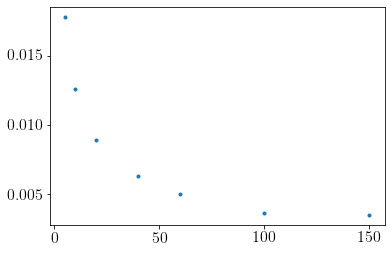

In [10]:
plt.plot(t_measure, Delta_S_S_ratio_sigma_2, '.')

## dalsi data

(262, 7)
[0.01107274 0.00830648 0.00625607 0.00438676 0.00346031 0.00279141
 0.00212174]
[ 6.77349079  9.90363256 14.64589124 20.91033655 24.51003417 31.40645239
 38.55764147]
[ 3.55271368e-15  1.77635684e-15 -3.55271368e-15  3.55271368e-15
 -7.10542736e-15  3.90798505e-14  0.00000000e+00]


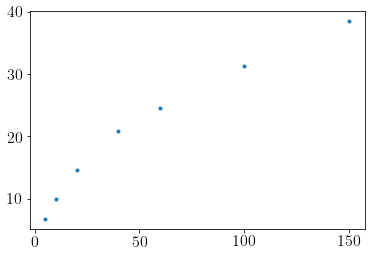

In [11]:
import numpy as np

####################### vstup

# data z picoharpu ve formatu: array(  ) sloupce: jednotlive histogramy -- posledni radek nula
# [data jednotlivych hist, cislo histogramy]
fotkor = np.genfromtxt("sigma_hist_test_128_delim.txt", delimiter="\t")[:,:-1] # signal bez MM 

# print(fotkor)

# pomocne promene
fotkor_shape = np.shape(fotkor)
print(fotkor_shape)

# parametry odecitani foton-korelacnich dat
t_res = [ 128e-12, 128e-12, 128e-12, 128e-12, 128e-12, 128e-12, 128e-12]  # casove rozliseni histogramu v s
t_measure = [5, 10, 20, 40, 60, 100, 150] # doba nacitani dat v s
background_photocounts = [120, 120, 120, 120, 120, 120, 120]

# casova skala foton-kor. dat
# t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

hist_sigmas = np.std(fotkor[:-2,:], axis=0)
# print(hist_sigmas_3)
from EMM_min_func import get_hist_fit_single_photocountssum

DeltaS_S_ratio = np.zeros(fotkor_shape[1])
Delta_S_S_ratio_sigma_3 = np.zeros(fotkor_shape[1])
photon_sum_3 = np.zeros(fotkor_shape[1])
hist_sigmas_3 = np.zeros(fotkor_shape[1])
# fot_phi_sigma = np.zeros(fotkor_shape[1])
# x = np.zeros((3,fotkor_shape[1]))
# Omega = np.zeros(fotkor_shape[1])
# Omega_sigma = np.zeros(fotkor_shape[1])
# nu = np.zeros(fotkor_shape[1])
# t_scale = np.zeros(fotkor_shape[1])

for i in range(fotkor_shape[1]):
#     get_hist_fit_single(fotkor[:-2,i], t_res, t_measure[i], 0, hist_sigmas[i] )
    DeltaS_S_ratio[i], Delta_S_S_ratio_sigma_3[i], photon_sum_3[i], hist_sigmas_3[i] = get_hist_fit_single_photocountssum(fotkor[:,i], t_res[i], t_measure[i], background_photocounts[i] )
    
# print(DeltaS_S_ratio)
print(Delta_S_S_ratio_sigma_3)

print(hist_sigmas_3)
print(hist_sigmas_3 - hist_sigmas)


plt.plot(t_measure, hist_sigmas_3, '.')

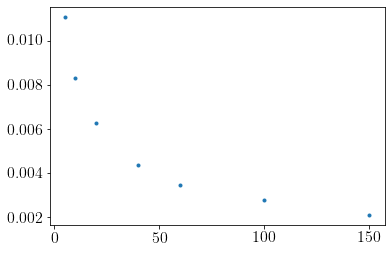

In [12]:


plt.plot(t_measure, Delta_S_S_ratio_sigma_3, '.')

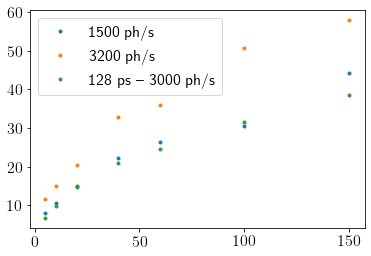

In [13]:
# plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(t_measure, hist_sigmas_2, '.', label='1500 ph/s')
plt.plot(t_measure, hist_sigmas_1, '.', label='3200 ph/s')
plt.plot(t_measure, hist_sigmas_3, '.', label='128 ps -- 3000 ph/s')

plt.legend()

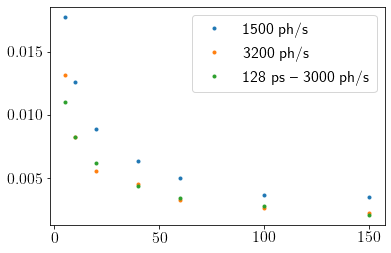

In [14]:
plt.plot(t_measure, Delta_S_S_ratio_sigma_2, '.', label='1500 ph/s')
plt.plot(t_measure, Delta_S_S_ratio_sigma_1, '.', label='3200 ph/s')
plt.plot(t_measure, Delta_S_S_ratio_sigma_3, '.', label='128 ps -- 3000 ph/s')

plt.legend()

vypada to, ze zavisi pouze na fotocountu a casu, tedy na celkovem poctu nascitanych fotonu?

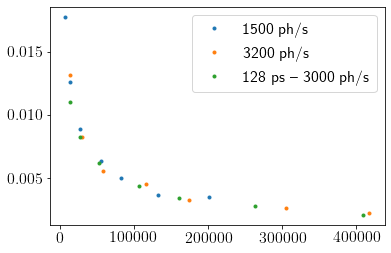

In [15]:
plt.plot(photon_sum_2, Delta_S_S_ratio_sigma_2, '.', label='1500 ph/s')
plt.plot(photon_sum_1, Delta_S_S_ratio_sigma_1, '.', label='3200 ph/s')
plt.plot(photon_sum_3, Delta_S_S_ratio_sigma_3, '.', label='128 ps -- 3000 ph/s')

plt.legend()

Potvrzeno

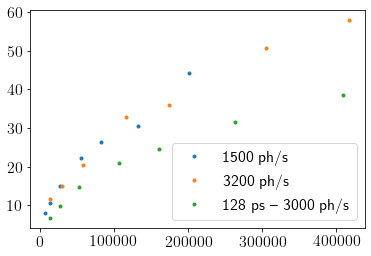

In [16]:
plt.plot(photon_sum_2, hist_sigmas_2, '.', label='1500 ph/s')
plt.plot(photon_sum_1, hist_sigmas_1, '.', label='3200 ph/s')
plt.plot(photon_sum_3, hist_sigmas_3, '.', label='128 ps -- 3000 ph/s')

plt.legend()

# Prepocet sigmy na sigmu modulacniho indexu

jen odhad

In [71]:
# parametry vypoctu beta

decay_rate = 2*np.pi * 21.008e6  # decay rate dle tabulek NISTu
laser_detun = -32e6 * 2*np.pi  # detuning 
laser_detun_sigma = 4e6 * 2*np.pi # sigma detun
Omega =2* np.pi * 30e6  # cca
Omega_sigma = 2*np.pi * 230898.38519217444 #cca

# numericke reseni deltaS/S -> beta

from scipy.optimize import fsolve
from scipy.special import j0, j1

def get_A(decay_rate, detun):
    # returns driven oscillator amplitude in point given by detun param.
    return 1 / 2 * (decay_rate / 2 - detun * 1j) / (detun ** 2 + (decay_rate / 2) ** 2)

def fl_signal(beta, laser_detun, Omega, decay_rate):
    # function calculates deltaS/S0 photon-correlation signal
    # input: beta, laser detuning, RF drive freq, decay rate
    A_minus = get_A(decay_rate, laser_detun - Omega)
    A_plus = get_A(decay_rate, laser_detun + Omega)
    A = get_A(decay_rate, laser_detun)

    numer = 2 * j0(beta) * j1(beta) * np.abs(np.conj(A) * A_plus - A * np.conj(A_minus))
    denom = j0(beta) ** 2 * np.abs(A) ** 2 + j1(beta) ** 2 * (np.abs(A_plus) ** 2 + np.abs(A_minus) ** 2)

    return numer / denom

def get_beta(Omega, decay_rate, laser_detun, norm_mod_amp):
    # function calculates the corresponding beta for given known parameters
    # input: drive frequency, decay_rate, laser detuning, normalized modulation amplitude given by ph_corr_signal
    # output: float value of beta
    def root_func(beta, laser_detun, Omega, decay_rate, norm_mod_amp):
        return fl_signal(beta, laser_detun, Omega, decay_rate) - norm_mod_amp

    sol = fsolve(root_func, np.array([0.01]), args=(laser_detun, Omega, decay_rate, norm_mod_amp), full_output=1)
    return float(sol[0])

from scipy.optimize import approx_fprime, check_grad

def root_func(x):
    [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    return fl_signal(beta, laser_detun, Omega, decay_rate) - norm_mod_amp

def root_func_grad(x):
#     [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    epsilon = 5e-6
    return( approx_fprime(x, root_func, x*epsilon ) )

In [72]:
from scipy.optimize import approx_fprime, check_grad

# get beta
beta = np.zeros(fotkor_shape[1])
beta_sigma_1 = np.zeros(fotkor_shape[1])
beta_sigma_2 = np.zeros(fotkor_shape[1])
beta_sigma_3 = np.zeros(fotkor_shape[1])
for k in range(fotkor_shape[1]):
    beta[k] = get_beta(Omega, decay_rate, laser_detun, 0.00001)
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta[k], 0.00001, Omega, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param_1 = np.diag([Delta_S_S_ratio_sigma_1[k]**2, Omega_sigma**2, laser_detun_sigma**2])
    
    beta_sigma_1[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param_1 @ np.transpose( jacob_F[1:-1] ) )
    
    # variance-cov parametru
    Sigma_param_2 = np.diag([Delta_S_S_ratio_sigma_2[k]**2, Omega_sigma**2, laser_detun_sigma**2])
    
    beta_sigma_2[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param_2 @ np.transpose( jacob_F[1:-1] ) )
    
    # variance-cov parametru
    Sigma_param_3 = np.diag([Delta_S_S_ratio_sigma_3[k]**2, Omega_sigma**2, laser_detun_sigma**2])
    
    beta_sigma_3[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param_3 @ np.transpose( jacob_F[1:-1] ) )

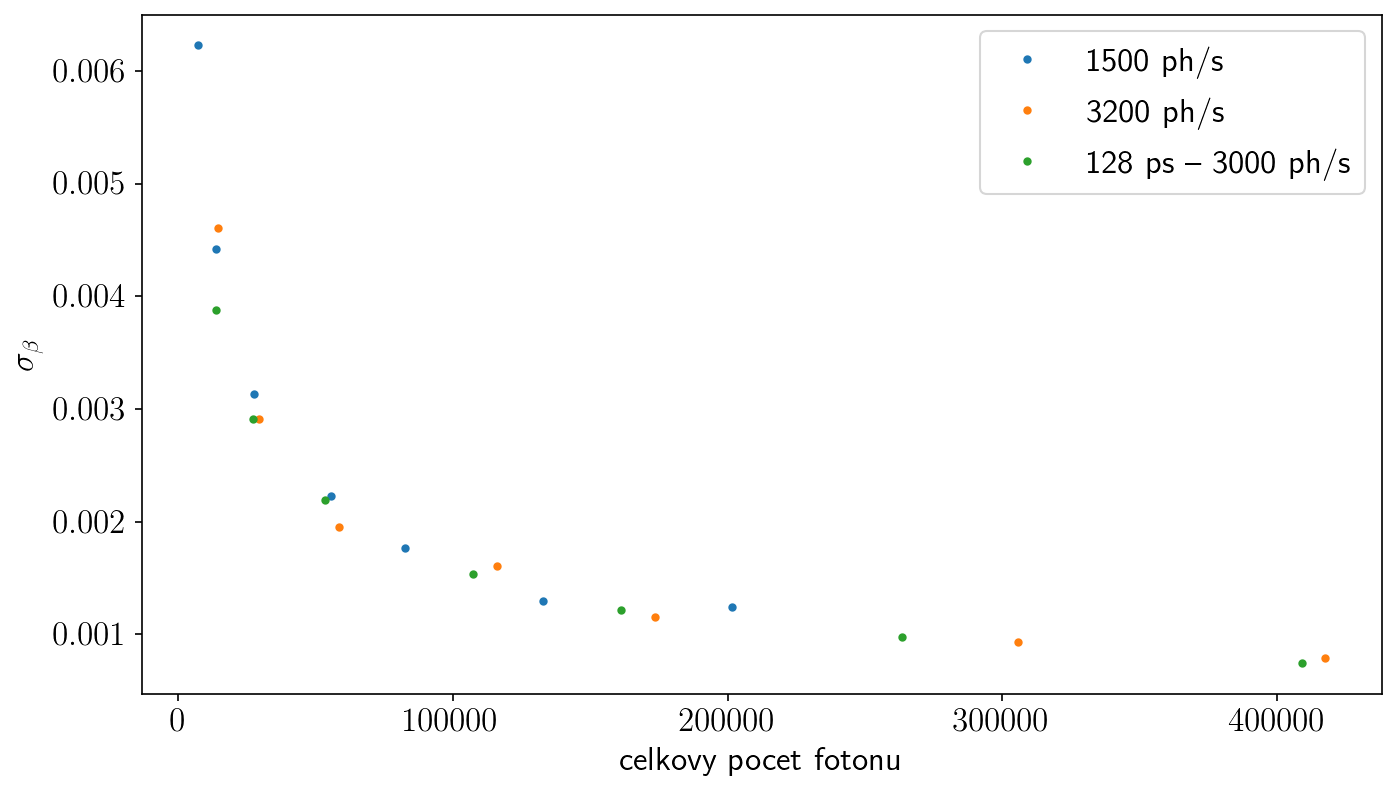

In [73]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plt.plot(photon_sum_2, beta_sigma_2, '.', label='1500 ph/s')
plt.plot(photon_sum_1, beta_sigma_1, '.', label='3200 ph/s')
plt.plot(photon_sum_3, beta_sigma_3, '.', label='128 ps -- 3000 ph/s')

plt.xlabel("celkovy pocet fotonu")
plt.ylabel(r'$\sigma_{\beta}$')
plt.legend()

budu cilit na cca 250 000 countu

## fit zjistenych zavyslosti + ploty do diplomky

In [23]:
hist_sigm = np.concatenate( (hist_sigmas_1, hist_sigmas_2) )
photon_sum = np.concatenate( (photon_sum_1, photon_sum_2) )
print(hist_sigm)
print(photon_sum)

[11.7076822  14.87633441 20.44297741 32.9064444  35.99406263 50.60113255
 57.87929953  7.88610117 10.63332931 15.06561782 22.3490717  26.26755936
 30.58373412 44.21215662]
[ 14326.  29531.  58459. 116205. 173749. 305707. 417540.   7159.  13598.
  27447.  55518.  82453. 132832. 201769.]


c/sqrt(N)  c= [0.09088658]


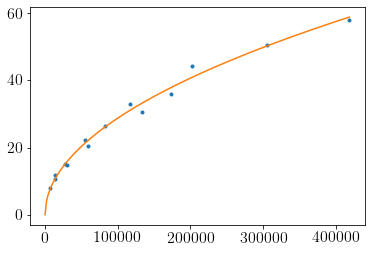

In [42]:
from scipy.optimize import least_squares

def hist_simg_fit_resid(x, photon_sum, hist_sigm):
    return( x * np.sqrt(photon_sum) - hist_sigm )

def get_hist_sigm_fit(x, photon_sum):
    return(x * np.sqrt(photon_sum))


x0 = 1

fit = least_squares(hist_simg_fit_resid, x0, args=(photon_sum, hist_sigm) )
print("c*sqrt(N)  c=",fit.x)

photon_sum_fit = np.linspace(0, photon_sum.max() + 1000, 200)
hist_sigm_fit = get_hist_sigm_fit(fit.x, photon_sum_fit)

plt.plot(photon_sum, hist_sigm, '.')
plt.plot(photon_sum_fit, hist_sigm_fit)

polovicni rozliseni histogramu znamena polovicni nejistoty bodu? zkusim

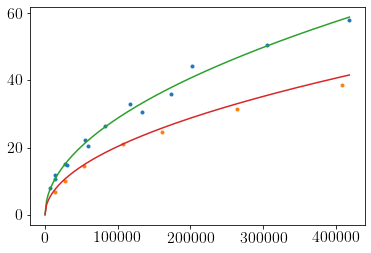

In [33]:
plt.plot(photon_sum, hist_sigm, '.')
plt.plot(photon_sum_3, hist_sigmas_3, '.')
plt.plot(photon_sum_fit, hist_sigm_fit)
plt.plot(photon_sum_fit, get_hist_sigm_fit(fit.x/np.sqrt(2), photon_sum_fit))

zda se, ze to souvisi s odmocninou poctu fotonu v jednom binu, ktery je u dvojnasobneho rozliseni polovicni 

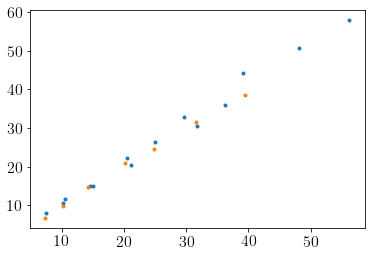

In [34]:
plt.plot(np.sqrt(photon_sum/132), hist_sigm, '.')
plt.plot(np.sqrt(photon_sum_3/264), hist_sigmas_3, '.')

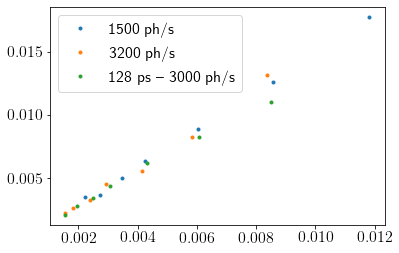

In [39]:
plt.plot(1/np.sqrt(photon_sum_2), Delta_S_S_ratio_sigma_2, '.', label='1500 ph/s')
plt.plot(1/np.sqrt(photon_sum_1), Delta_S_S_ratio_sigma_1, '.', label='3200 ph/s')
plt.plot(1/np.sqrt(photon_sum_3), Delta_S_S_ratio_sigma_3, '.', label='128 ps -- 3000 ph/s')

plt.legend()

c/sqrt(N)  c= [1.45580016]


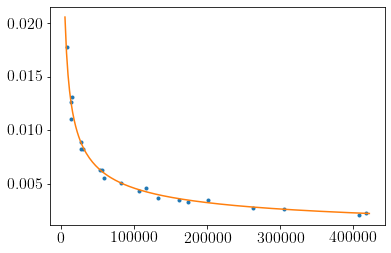

In [117]:
from scipy.optimize import least_squares

def DS_S_ratio_sigma_fit_resid(x, photon_sum_sqrt_invers, DS_S_ratio_sigma):
    return( x * photon_sum_sqrt_invers - DS_S_ratio_sigma )

def get_DS_S_ratio_sigma_fit(x, photon_sum):
    return( x / np.sqrt(photon_sum) )


x0 = 1
photon_sum_123 = np.concatenate((photon_sum, photon_sum_3))
DeltaS_S_ratio_sigmas = np.concatenate( (Delta_S_S_ratio_sigma_1, Delta_S_S_ratio_sigma_2, Delta_S_S_ratio_sigma_3))

fit = least_squares(DS_S_ratio_sigma_fit_resid, x0, args=(1/np.sqrt(photon_sum_123), DeltaS_S_ratio_sigmas) )
print("c/sqrt(N)  c=",fit.x)
c_DeltaS = fit.x

photon_sum_fit = np.linspace(5000, photon_sum_123.max() + 5000, 200)
DeltaS_S_ratio_sigmas_fit = get_DS_S_ratio_sigma_fit(fit.x, photon_sum_fit)

plt.plot(photon_sum_123, DeltaS_S_ratio_sigmas, '.')
plt.plot(photon_sum_fit, DeltaS_S_ratio_sigmas_fit)

c/sqrt(N)  c= [0.50982948]


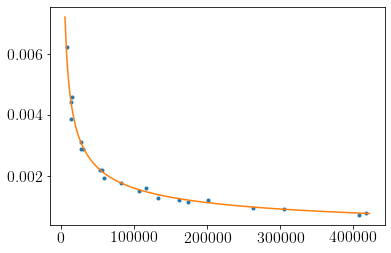

In [118]:
from scipy.optimize import least_squares

def DS_S_ratio_sigma_fit_resid(x, photon_sum_sqrt_invers, DS_S_ratio_sigma):
    return( x * photon_sum_sqrt_invers - DS_S_ratio_sigma )

def get_DS_S_ratio_sigma_fit(x, photon_sum):
    return( x / np.sqrt(photon_sum) )


x0 = 1
photon_sum_123 = np.concatenate((photon_sum, photon_sum_3))
beta_sigmas = np.concatenate( (beta_sigma_1, beta_sigma_2, beta_sigma_3))

fit = least_squares(DS_S_ratio_sigma_fit_resid, x0, args=(1/np.sqrt(photon_sum_123), beta_sigmas) )
print("c/sqrt(N)  c=",fit.x)
c_beta = fit.x

photon_sum_fit = np.linspace(5000, photon_sum_123.max() + 5000, 200)
beta_sigmas_fit = get_DS_S_ratio_sigma_fit(fit.x, photon_sum_fit)

plt.plot(photon_sum_123, beta_sigmas, '.')
plt.plot(photon_sum_fit, beta_sigmas_fit)

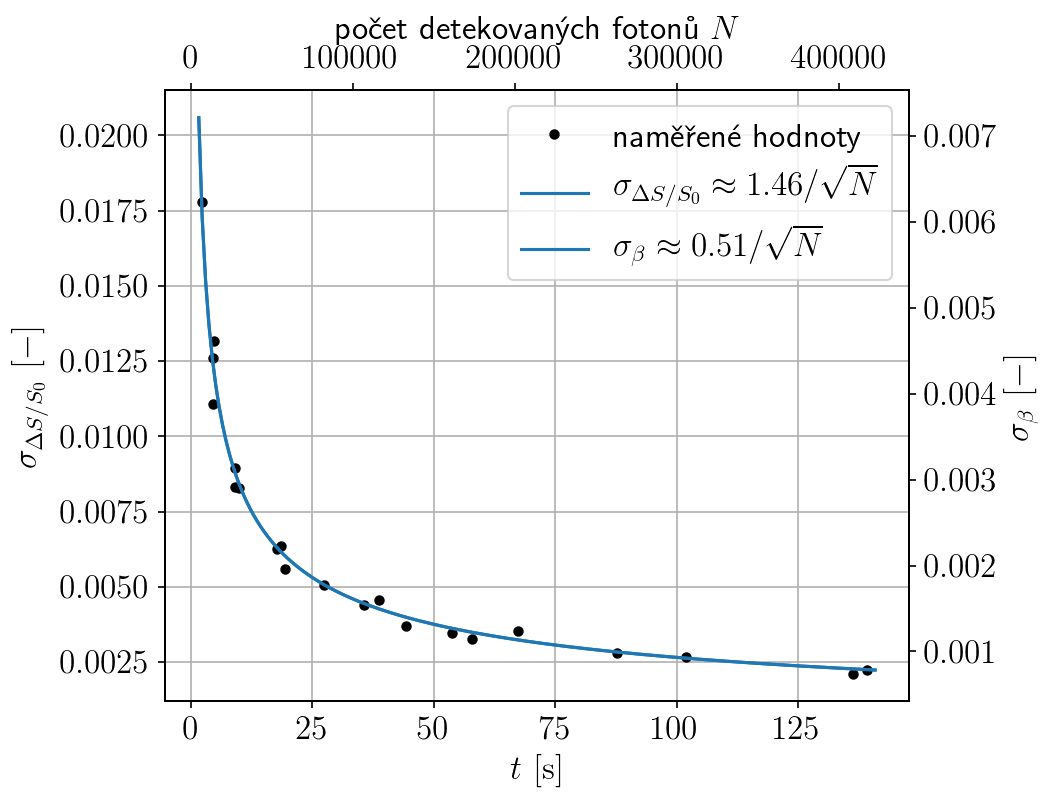

In [150]:
plt.figure(figsize=(sizex/my_dpi*0.6, sizey/my_dpi*0.9), dpi=my_dpi)

x = plt.gca()

# priklad countratu
t_example = photon_sum_123 / 3000
t_example_fit = photon_sum_fit/3000

x.plot(t_example, DeltaS_S_ratio_sigmas, '.', color='black', markersize=8, label="naměřené hodnoty")
x.plot(t_example_fit, DeltaS_S_ratio_sigmas_fit, label=r"$\sigma_{{\Delta S/S_0}} \approx {:.2f} / \sqrt{{N}}$".format( float(c_DeltaS) ))

# duplikat stejne krivky kvuli legende
x.plot(t_example_fit, DeltaS_S_ratio_sigmas_fit, label=r"$\sigma_{{\beta}} \approx {:.2f} / \sqrt{{N}}$".format( float(c_beta) ), color='#1f77b4')


x2 = x.twiny()
# x2.plot(photon_sum_123, DeltaS_S_ratio_sigmas, '+', alpha=1)
x2.set_xlim(x.get_xlim()[0]*3000, x.get_xlim()[1]*3000)

x3 = x.twinx()
# x3.plot(t_example, beta_sigmas, '+', alpha=0)
# x3.plot(t_example_fit, beta_sigmas_fit, alpha=0, label=r"$\sigma_{{\beta}} \approx {:.2f} / \sqrt{{N}}$".format( float(c_beta) ))
# nelinearni osa y
x3.set_ylim(get_beta(Omega, decay_rate, laser_detun, x.get_ylim()[0]), get_beta(Omega, decay_rate, laser_detun, x.get_ylim()[1]))

# popisky
x.set_xlabel(r"$t \, \, \rm [s]$")
x.set_ylabel(r"$ \sigma_{\Delta S/S_0} \, \, \rm [-]$")
x2.set_xlabel(r"počet detekovaných fotonů $N$")
x3.set_ylabel(r"$ \sigma_{\beta} \, \, \rm [-]$")


x.legend()
x.grid()

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/hist_sigma_vs_N_v1.svg", bbox_inches="tight")

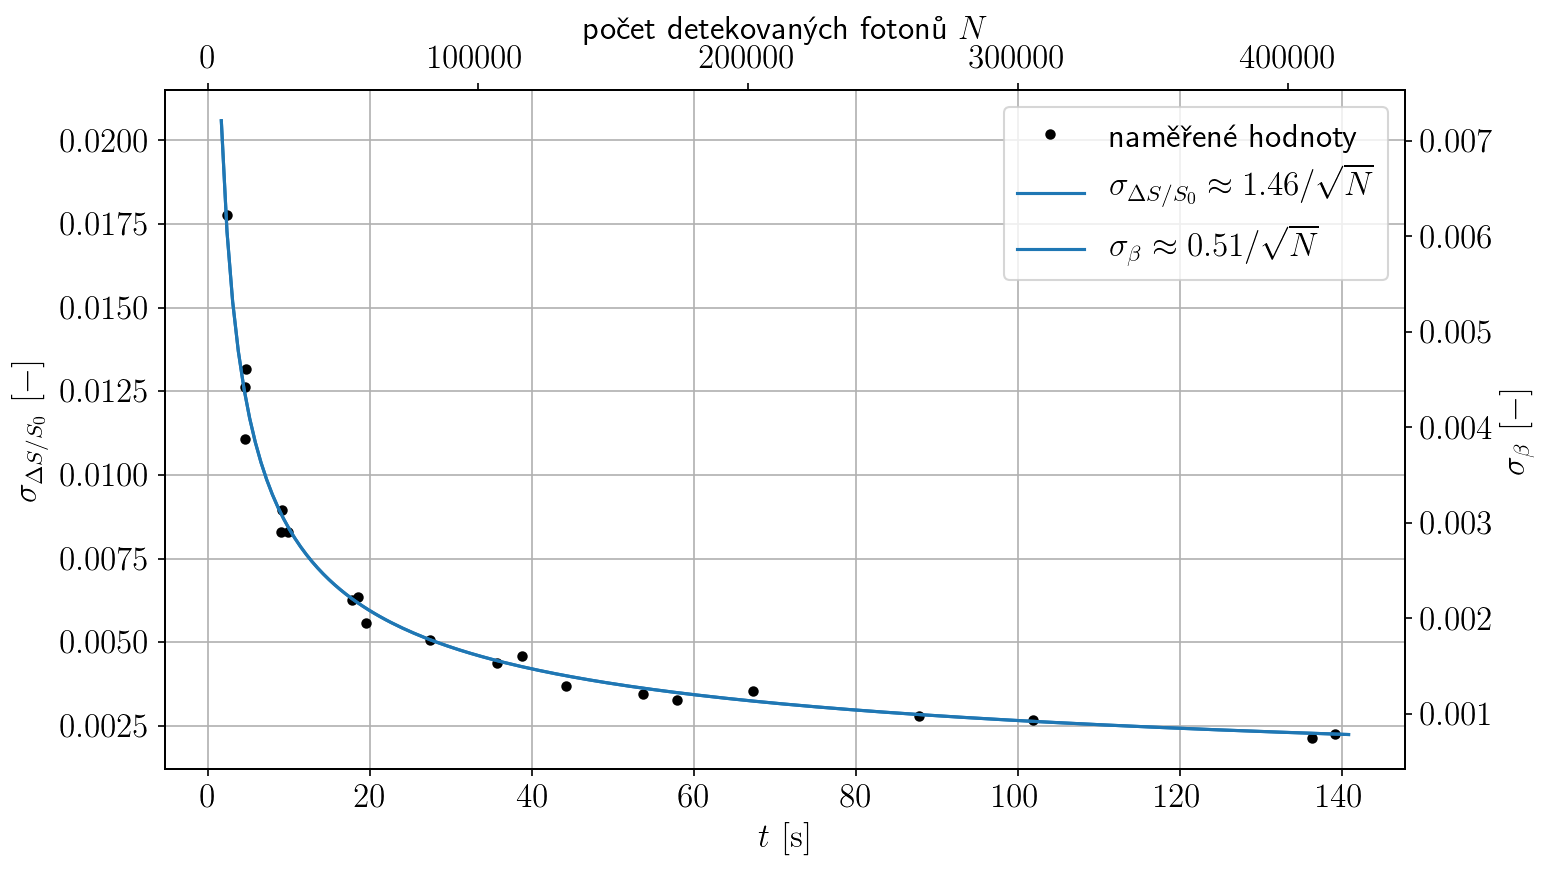

In [151]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x = plt.gca()

# priklad countratu
t_example = photon_sum_123 / 3000
t_example_fit = photon_sum_fit/3000

x.plot(t_example, DeltaS_S_ratio_sigmas, '.', color='black', markersize=8, label="naměřené hodnoty")
x.plot(t_example_fit, DeltaS_S_ratio_sigmas_fit, label=r"$\sigma_{{\Delta S/S_0}} \approx {:.2f} / \sqrt{{N}}$".format( float(c_DeltaS) ))

# duplikat stejne krivky kvuli legende
x.plot(t_example_fit, DeltaS_S_ratio_sigmas_fit, label=r"$\sigma_{{\beta}} \approx {:.2f} / \sqrt{{N}}$".format( float(c_beta) ), color='#1f77b4')


x2 = x.twiny()
# x2.plot(photon_sum_123, DeltaS_S_ratio_sigmas, '+', alpha=1)
x2.set_xlim(x.get_xlim()[0]*3000, x.get_xlim()[1]*3000)

x3 = x.twinx()
# x3.plot(t_example, beta_sigmas, '+', alpha=0)
# x3.plot(t_example_fit, beta_sigmas_fit, alpha=0, label=r"$\sigma_{{\beta}} \approx {:.2f} / \sqrt{{N}}$".format( float(c_beta) ))
# nelinearni osa y
x3.set_ylim(get_beta(Omega, decay_rate, laser_detun, x.get_ylim()[0]), get_beta(Omega, decay_rate, laser_detun, x.get_ylim()[1]))

# popisky
x.set_xlabel(r"$t \, \, \rm [s]$")
x.set_ylabel(r"$ \sigma_{\Delta S/S_0} \, \, \rm [-]$")
x2.set_xlabel(r"počet detekovaných fotonů $N$")
x3.set_ylabel(r"$ \sigma_{\beta} \, \, \rm [-]$")


x.legend()
x.grid()

# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/hist_sigma_vs_N_v2.svg", bbox_inches="tight")

In [136]:
photon_sum_123

array([ 14326.,  29531.,  58459., 116205., 173749., 305707., 417540.,
         7159.,  13598.,  27447.,  55518.,  82453., 132832., 201769.,
        13872.,  27179.,  53351., 107176., 161211., 263418., 409040.])